In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import json

#Cam 1
with open('1Cam/eval.log') as f:
    ev = f.read()

with open('1Cam/train.log') as f:
    tr = f.read()
    
eva = [json.loads(line) for line in ev.split("\n") if line.strip() != ""]
eval_data_1 = pd.DataFrame(eva)

tra = [json.loads(line) for line in tr.split("\n") if line.strip() != ""]
train_data_1 = pd.DataFrame(tra)


#Cam 2
with open('2Cam/eval.log') as f:
    ev = f.read()

with open('2Cam/train.log') as f:
    tr = f.read()
    
eva = [json.loads(line) for line in ev.split("\n") if line.strip() != ""]
eval_data_2 = pd.DataFrame(eva)

tra = [json.loads(line) for line in tr.split("\n") if line.strip() != ""]
train_data_2 = pd.DataFrame(tra)


#Cam 3
with open('3Cam/eval.log') as f:
    ev = f.read()

with open('3Cam/train.log') as f:
    tr = f.read()
    
eva = [json.loads(line) for line in ev.split("\n") if line.strip() != ""]
eval_data_3 = pd.DataFrame(eva)

tra = [json.loads(line) for line in tr.split("\n") if line.strip() != ""]
train_data_3 = pd.DataFrame(tra)

#Cam 8
with open('8Cam/eval.log') as f:
    ev = f.read()

with open('8Cam/train.log') as f:
    tr = f.read()
    
eva = [json.loads(line) for line in ev.split("\n") if line.strip() != ""]
eval_data_8 = pd.DataFrame(eva)

tra = [json.loads(line) for line in tr.split("\n") if line.strip() != ""]
train_data_8 = pd.DataFrame(tra)

In [12]:
import numpy as np
step1 = np.zeros(shape=(train_data_1.shape[0],1))
step2 = np.zeros(shape=(train_data_2.shape[0],1))
step3 = np.zeros(shape=(train_data_3.shape[0],1))
step8 = np.zeros(shape=(train_data_8.shape[0],1))
print(step1.size, step2.size)

for i in range(train_data_1.shape[0]):
    step1[i]= train_data_1["step"][i]/100000
    step2[i]= train_data_2["step"][i]/100000
    step3[i]= train_data_3["step"][i]/100000
    step8[i]= train_data_8["step"][i]/100000

99 105


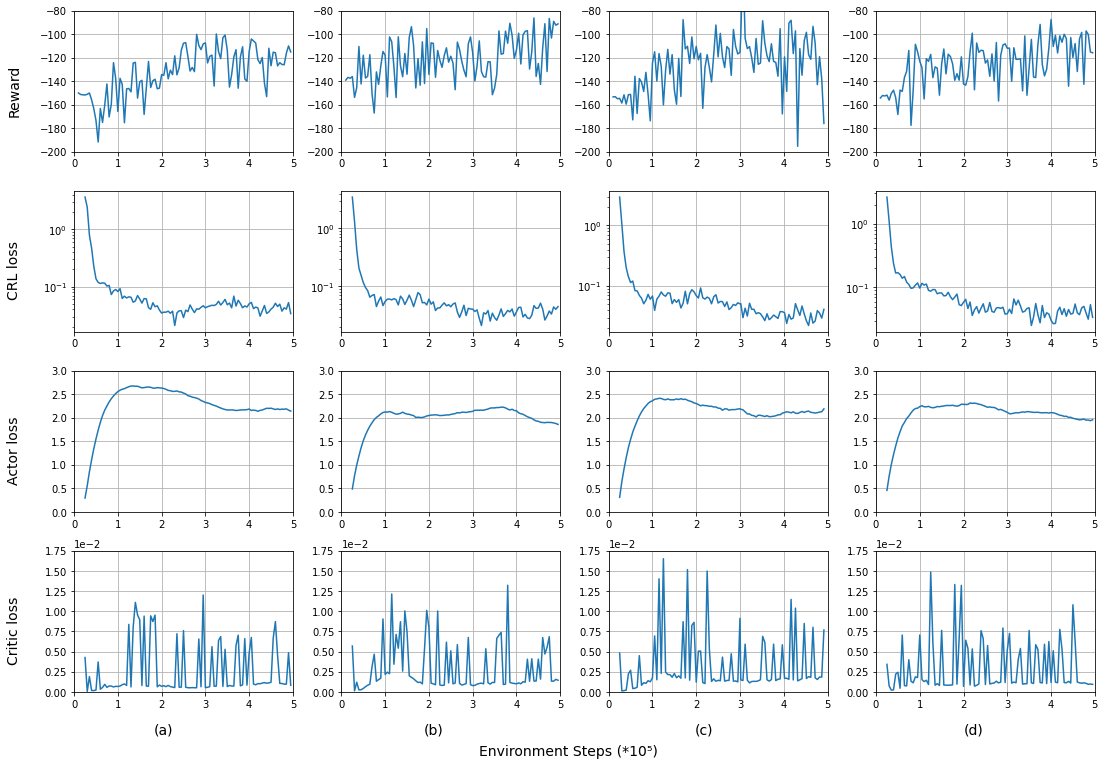

In [18]:
#Episode reward
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(4, 4, figsize=(15,10))

plt.setp(ax[0,:], xlim=(0,5), ylim=(-200, -80))
plt.setp(ax[1,:], xlim=(0,5))
plt.setp(ax[2,:], xlim=(0,5), ylim=(0,3))
plt.setp(ax[3,:], xlim=(0,5), ylim=(0,0.0175))


fig.text(0.5, -0.05, 'Environment Steps (*10⁵)', ha='center', fontsize=14)

fig.text(0.125, -0.02, '(a)', ha='center', fontsize=14)
fig.text(0.25+0.125, -0.02, '(b)', ha='center', fontsize=14)
fig.text(0.5+0.125, -0.02, '(c)', ha='center', fontsize=14)
fig.text(0.75+0.125, -0.02, '(d)', ha='center', fontsize=14)

fig.text(-0.02, 0.125, 'Critic loss', va='center', rotation='vertical', fontsize=14)
fig.text(-0.02, 0.25+0.125, 'Actor loss', va='center', rotation='vertical', fontsize=14)
fig.text(-0.02, 0.5+0.125, 'CRL loss', va='center', rotation='vertical', fontsize=14)
fig.text(-0.02, 0.75+0.125, 'Reward', va='center', rotation='vertical', fontsize=14)

ax[3,0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[3,1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[3,2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[3,3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax[0,0].plot(step1[1:],train_data_1["episode_reward"][1:])
ax[0,0].grid(True)

ax[1,0].plot(step1,train_data_1["curl_loss"])
ax[1,0].set_yscale(u'log')
ax[1,0].grid(True)

ax[2,0].plot(step1,train_data_1["actor_loss"])
ax[2,0].grid(True)

ax[3,0].plot(step1,train_data_1["critic_loss"])
ax[3,0].grid(True)

ax[0,1].plot(step2[1:99],train_data_2["episode_reward"][1:99])
ax[0,1].grid(True)

ax[1,1].plot(step2[:99],train_data_2["curl_loss"][:99])
ax[1,1].set_yscale(u'log')
ax[1,1].grid(True)

ax[2,1].plot(step2[:99],train_data_2["actor_loss"][:99])
ax[2,1].grid(True)

ax[3,1].plot(step2[:99],train_data_2["critic_loss"][:99])
ax[3,1].grid(True)

ax[0,2].plot(step3[1:99],train_data_3["episode_reward"][1:99])
ax[0,2].grid(True)

ax[1,2].plot(step3[:99],train_data_3["curl_loss"][:99])
ax[1,2].set_yscale(u'log')
ax[1,2].grid(True)

ax[2,2].plot(step3[:99],train_data_3["actor_loss"][:99])
ax[2,2].grid(True)

ax[3,2].plot(step3[:99],train_data_3["critic_loss"][:99])
ax[3,2].grid(True)

ax[0,3].plot(step8[1:99],train_data_8["episode_reward"][1:99])
ax[0,3].grid(True)

ax[1,3].plot(step8[:99],train_data_8["curl_loss"][:99])
ax[1,3].set_yscale(u'log')
ax[1,3].grid(True)

ax[2,3].plot(step8[:99],train_data_8["actor_loss"][:99])
ax[2,3].grid(True)

ax[3,3].plot(step8[:99],train_data_8["critic_loss"][:99])
ax[3,3].grid(True)

fig.tight_layout()
plt.savefig('plot-paper.jpg', bbox_inches = "tight")
plt.show()
